In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt

In [2]:
pandas.options.display.max_columns=50

In [3]:
df = pandas.read_csv("./data/DataCoSupplyChainDataset.csv", encoding_errors="ignore")
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [4]:
df.drop(columns=["Customer Email", "Customer Fname", "Customer Lname", "Product Description",
                "Customer Password", "Product Image"], inplace=True)

In [5]:
df.describe(include="all", datetime_is_numeric=True)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
count,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,180519,180519.000000,180519,180519,180519,180516.000000,180519.000000,180519,180519.000000,180519.000000,180519,180519,180519,180519.000000,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519,180519,24840.000000,180519.000000,180519.000000,180519,180519.000000,180519.0,180519,180519
unique,4,NaN,NaN,NaN,NaN,4,NaN,NaN,50,563,2,NaN,3,46,7458,NaN,NaN,11,NaN,NaN,5,3596,164,NaN,65752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1089,9,NaN,NaN,NaN,118,NaN,NaN,63701,4
top,DEBIT,NaN,NaN,NaN,NaN,Late delivery,NaN,NaN,Cleats,Caguas,EE. UU.,NaN,Consumer,PR,9126 Wishing Expressway,NaN,NaN,Fan Shop,NaN,NaN,LATAM,Santo Domingo,Estados Unidos,NaN,12/14/2016 12:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central America,Inglaterra,COMPLETE,NaN,NaN,NaN,Perfect Fitness Perfect Rip Deck,NaN,NaN,1/5/2016 5:58,Standard Class
freq,69295,NaN,NaN,NaN,NaN,98977,NaN,NaN,24551,66770,111146,NaN,93504,69373,122,NaN,NaN,66861,NaN,NaN,51594,2211,24840,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28341,6722,59491,NaN,NaN,NaN,24515,NaN,NaN,10,107752
mean,NaN,3.497654,2.931847,21.974989,183.107609,NaN,0.548291,31.851451,NaN,NaN,NaN,6691.379495,NaN,NaN,NaN,35921.126914,5.443460,NaN,29.719955,-84.915675,NaN,NaN,NaN,6691.379495,NaN,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,NaN,NaN,NaN,55426.132327,692.509764,31.851451,NaN,141.232550,0.0,NaN,NaN
std,NaN,1.623722,1.374449,104.433526,120.043670,NaN,0.497664,15.640064,NaN,NaN,NaN,4162.918106,NaN,NaN,NaN,37542.461122,1.629246,NaN,9.813646,21.433241,NaN,NaN,NaN,4162.918106,NaN,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,NaN,NaN,NaN,31919.279101,336.446807,15.640064,NaN,139.732492,0.0,NaN,NaN
min,NaN,0.000000,0.000000,-4274.979980,7.490000,NaN,0.000000,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,603.000000,2.000000,NaN,-33.937553,-158.025986,NaN,NaN,NaN,1.000000,NaN,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,NaN,NaN,NaN,1040.000000,19.000000,2.000000,NaN,9.990000,0.0,NaN,NaN
25%,NaN,2.000000,2.000000,7.000000,104.379997,NaN,0.000000,18.000000,NaN,NaN,NaN,3258.500000,NaN,NaN,NaN,725.000000,4.000000,NaN,18.265432,-98.446312,NaN,NaN,NaN,3258.500000,NaN,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,NaN,NaN,NaN,23464.000000,403.000000,18.000000,NaN,50.000000,0.0,NaN,NaN
50%,NaN,3.000000,4.000000,31.520000,163.990005,NaN,1.000000,29.000000,NaN,NaN,NaN,6457.000000,NaN,NaN,NaN,19380.000000,5.000000,NaN,33.144863,-76.847908,NaN,NaN,NaN,6457.000000,NaN,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,NaN,NaN,NaN,59405.000000,627.000000,29.000000,NaN,59.990002,0.0,NaN,NaN
75%,NaN,5.000000,4.000000,64.800003,247.399994,NaN,1.000000,45.000000,NaN,NaN,NaN,9779.000000,NaN,NaN,NaN,78207.000000,7.0000

In [6]:
df['shipping date (DateOrders)'] = pandas.to_datetime(df['shipping date (DateOrders)'], infer_datetime_format=True)

In [7]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastn,PENDING,NaN,1360,73,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastn,CLOSED,NaN,1360,73,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class


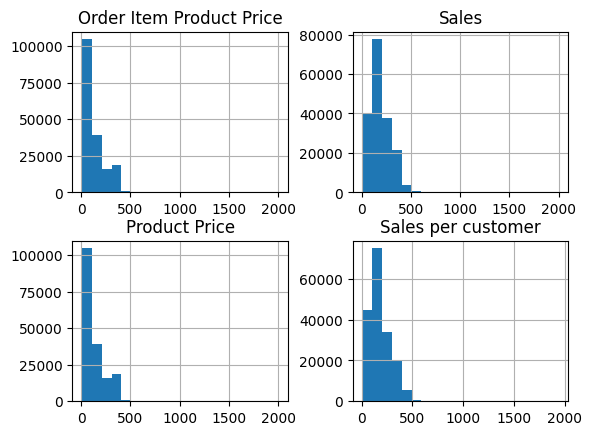

In [8]:
df[["Order Item Product Price", "Sales", "Product Price", "Sales per customer"]].hist(bins=20)
plt.show()

In [9]:
df["Delivery Status"].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [187]:
sales_region = df.groupby("Order Region").mean()
sales_region.reset_index(inplace=True)

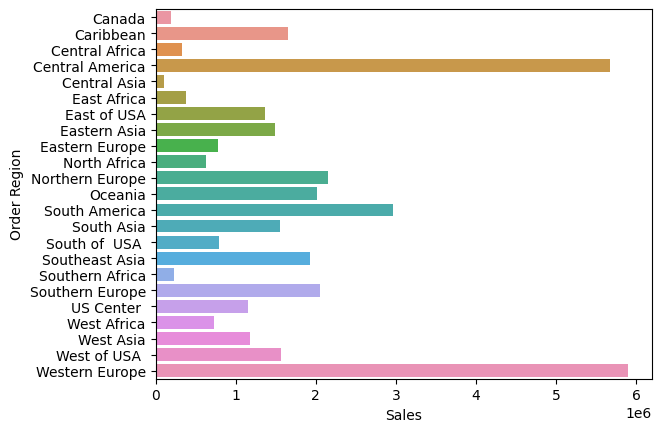

In [11]:
seaborn.barplot(data=sales_region, x="Sales", y="Order Region")
plt.show()

In [12]:
customer_group = df.groupby(["Customer Id", "Order Region"]).sum()
customer_group.reset_index(inplace=True)

In [13]:
customer_group = customer_group.sort_values(by="Sales", ascending=False).head(50)

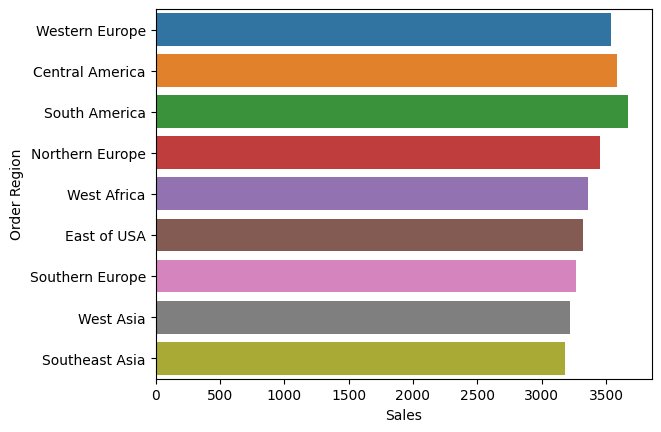

In [14]:
seaborn.barplot(data=customer_group, x="Sales", y="Order Region", errorbar=('ci', 0))
plt.show()

In [20]:
order_sales = df[["order date (DateOrders)", "Sales"]].copy()
order_sales["order date (DateOrders)"] = pandas.to_datetime(order_sales["order date (DateOrders)"], infer_datetime_format=True)
order_sales.set_index(keys="order date (DateOrders)", inplace=True)

In [29]:
order_sam = order_sales.resample("M").sum()

In [30]:
order_sam.head()

,Sales
order date (DateOrders),
2015-01-31,1.051590e+06
2015-02-28,9.270099e+05
2015-03-31,1.051254e+06
2015-04-30,1.014463e+06
2015-05-31,1.050478e+06


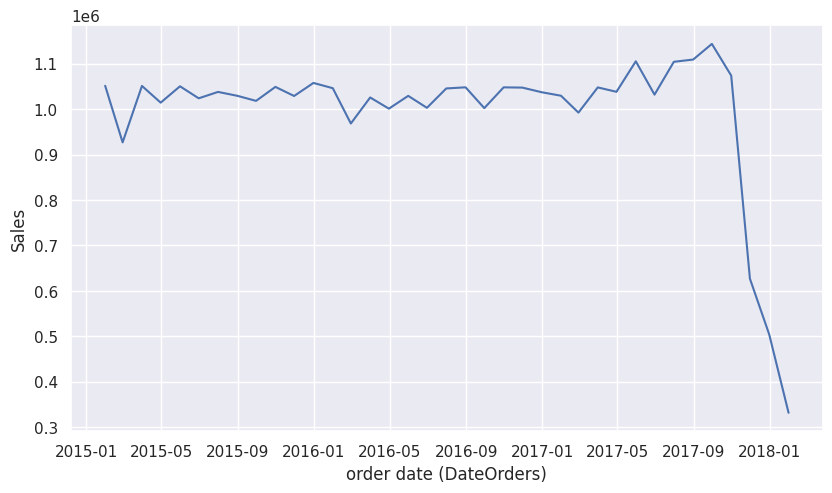

In [33]:
seaborn.set(rc={'figure.figsize':(9.7,5.27)})
seaborn.lineplot(order_sam["Sales"])
plt.show()

In [149]:
customer_city = df.groupby(["Order Region", "Order City"]).sum()
customer_city.reset_index(inplace=True)
customer_city.sort_values(by="Sales", ascending=False, inplace=True)

In [150]:
order_regions = customer_city["Order Region"].unique()
order_region = order_regions[:5]

In [151]:
order_region_city = {}
for regions in order_region:
    order_region_city[regions] = list()
    for i, r in customer_city.iterrows():
        if r["Order Region"] == regions:
            order_region_city[regions].append([r["Order Region"],r["Order City"], r["Sales"]])
        if len(order_region_city[regions]) == 3:
            break

In [152]:
order_city_2 = list(order_region_city.values())
order_city_2

[[['East of USA', 'New York City', 436061.53815919097],
  ['East of USA', 'Philadelphia', 255914.24494772],
  ['East of USA', 'Columbus', 58845.66120232]],
 [['Caribbean', 'Santo Domingo', 432351.87830275],
  ['Caribbean', 'Santiago de Cuba', 111108.93214928],
  ['Caribbean', 'Carrefour', 89838.84183229]],
 [['West of USA ', 'Los Angeles', 370545.137496732],
  ['West of USA ', 'San Francisco', 256245.62534535],
  ['West of USA ', 'Seattle', 206658.243977751]],
 [['Central America', 'Tegucigalpa', 364129.98711335],
  ['Central America', 'Managua', 335424.75648554],
  ['Central America', 'Mexico City', 298471.83588349]],
 [['Southeast Asia', 'Manila', 271819.8050301],
  ['Southeast Asia', 'Yakarta', 205532.43400871],
  ['Southeast Asia', 'Bangkok', 185935.21356262]]]

In [153]:
order_cty = list()
for i in range(len(order_city_2)):
    for n in range(len(order_city_2[i])):
        order_cty.append(order_city_2[i][n])

In [155]:
reg_cty_sales = pandas.DataFrame(order_cty, columns=["Region", "City", "Sales"])

In [156]:
reg_cty_sales

,Region,City,Sales
0,East of USA,New York City,436061.538159
1,East of USA,Philadelphia,255914.244948
2,East of USA,Columbus,58845.661202
3,Caribbean,Santo Domingo,432351.878303
4,Caribbean,Santiago de Cuba,111108.932149
5,Caribbean,Carrefour,89838.841832
6,West of USA,Los Angeles,370545.137497
7,West of USA,San Francisco,256245.625345
8,West of USA,Seattle,206658.243978
9,Central America,Tegucigalpa,364129.987113


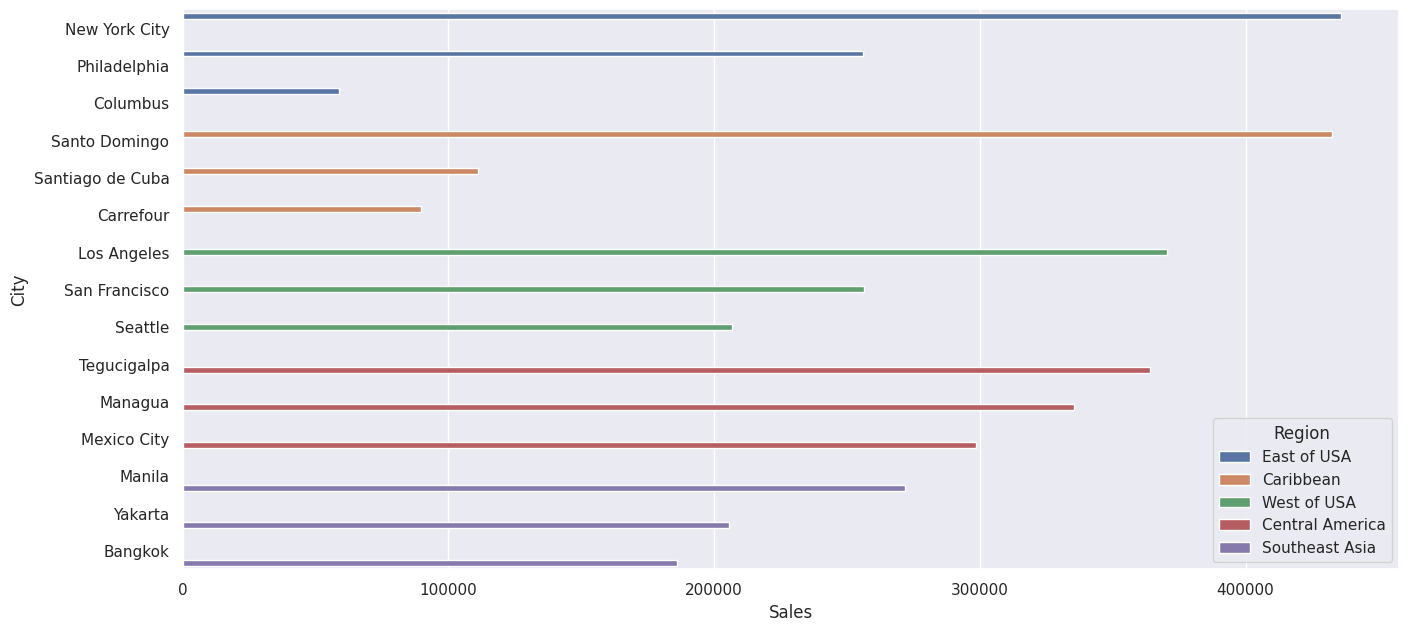

In [158]:
seaborn.barplot(data=reg_cty_sales, y="City", x="Sales", hue="Region")
plt.show()

In [160]:
item_cat = df.groupby(["Department Name", "Category Name"]).sum()
item_cat.reset_index(inplace=True)

In [161]:
item_cat.sort_values(by="Sales", ascending=False, inplace=True)
item_cat_10 = item_cat.head(5)

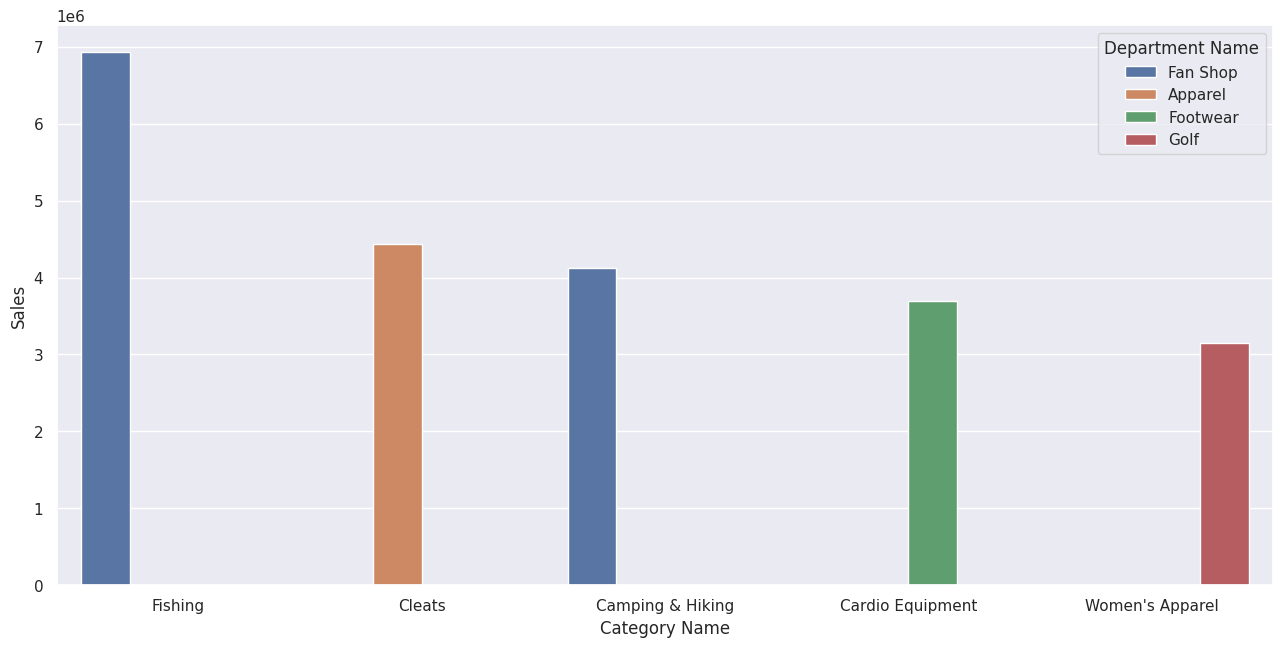

In [163]:
seaborn.barplot(data=item_cat_10, x="Category Name", y="Sales", hue="Department Name")
plt.show()

In [124]:
dept_cat = df.groupby(["Department Name"]).sum()
dept_cat.reset_index(inplace=True)

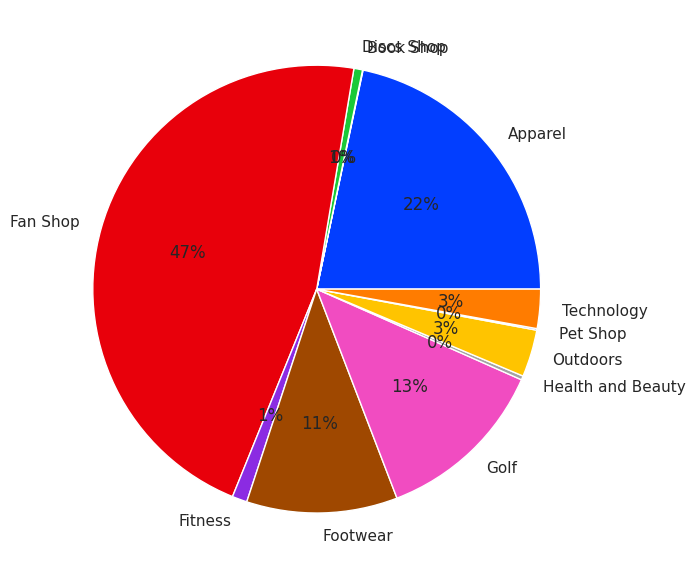

In [134]:
seaborn.set(rc={'figure.figsize':(15.7,7.27)})

# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')[0:9]
  
# plotting data on chart
plt.pie(dept_cat["Sales"], labels=dept_cat["Department Name"], colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [178]:
late_deliveries = df[df["Delivery Status"]=="Late delivery"]
on_time_shipping = df[df["Delivery Status"]=="Shipping on time"]

In [169]:
df["Delivery Status"].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [179]:
late_delivery_counts = late_deliveries["Order Region"].value_counts().to_frame()
late_delivery_counts.reset_index(inplace=True)
on_time_shipping_counts = on_time_shipping["Order Region"].value_counts().to_frame()
on_time_shipping_counts.reset_index(inplace=True)

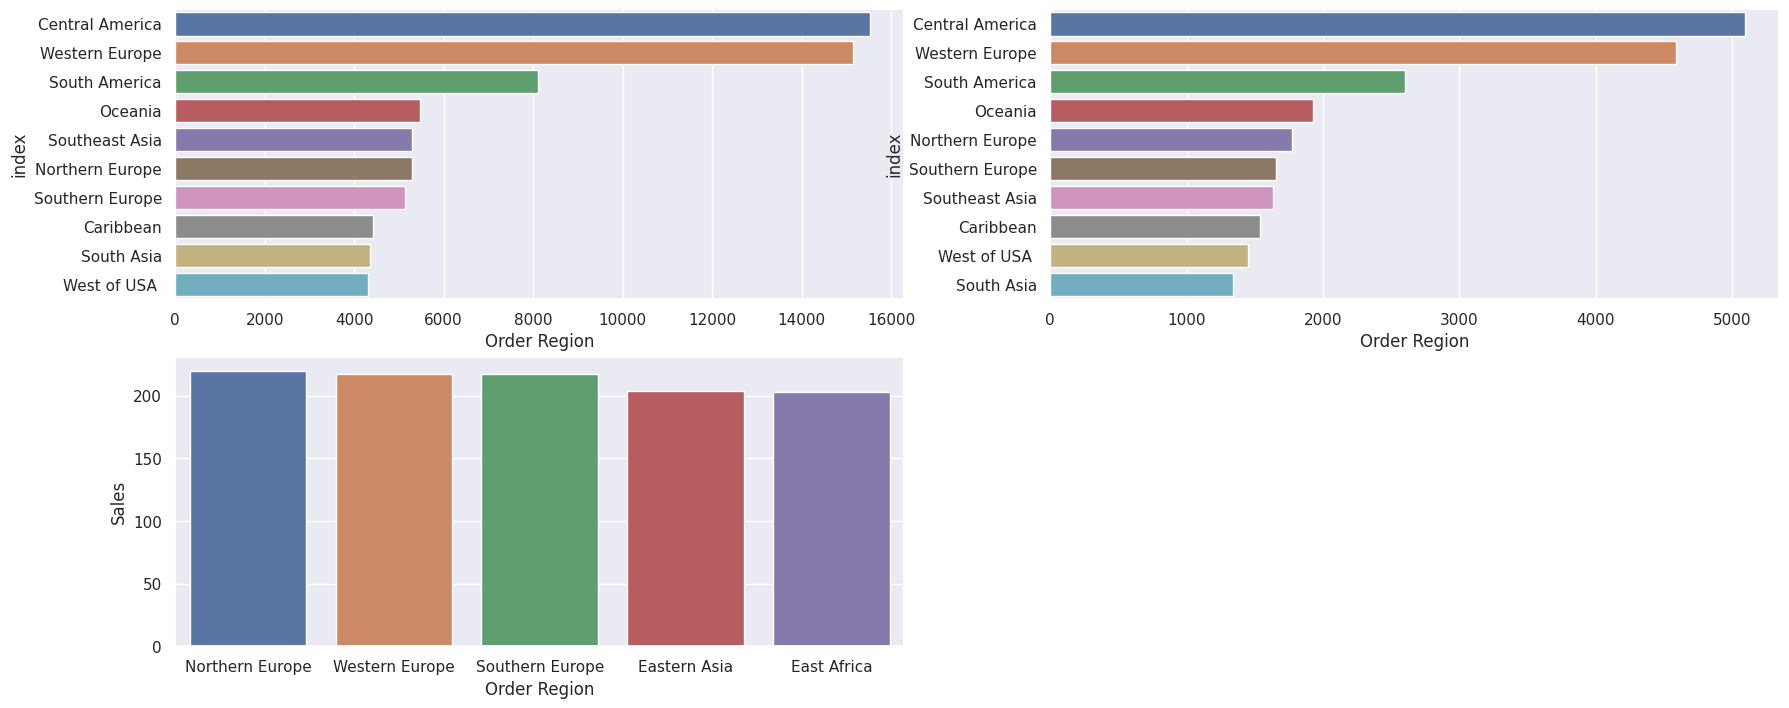

In [192]:
seaborn.set(rc={'figure.figsize':(20.7,8.27)})
plt.subplot(2,2,1)
seaborn.barplot(late_delivery_counts[:10], y="index", x="Order Region")
plt.subplot(2,2,2)
seaborn.barplot(on_time_shipping_counts[:10], y="index", x="Order Region")
plt.subplot(2,2,3)
sales_region_sort = sales_region.sort_values(by="Sales", ascending=False)
seaborn.barplot(sales_region_sort[:5], y="Sales", x="Order Region")
plt.show()

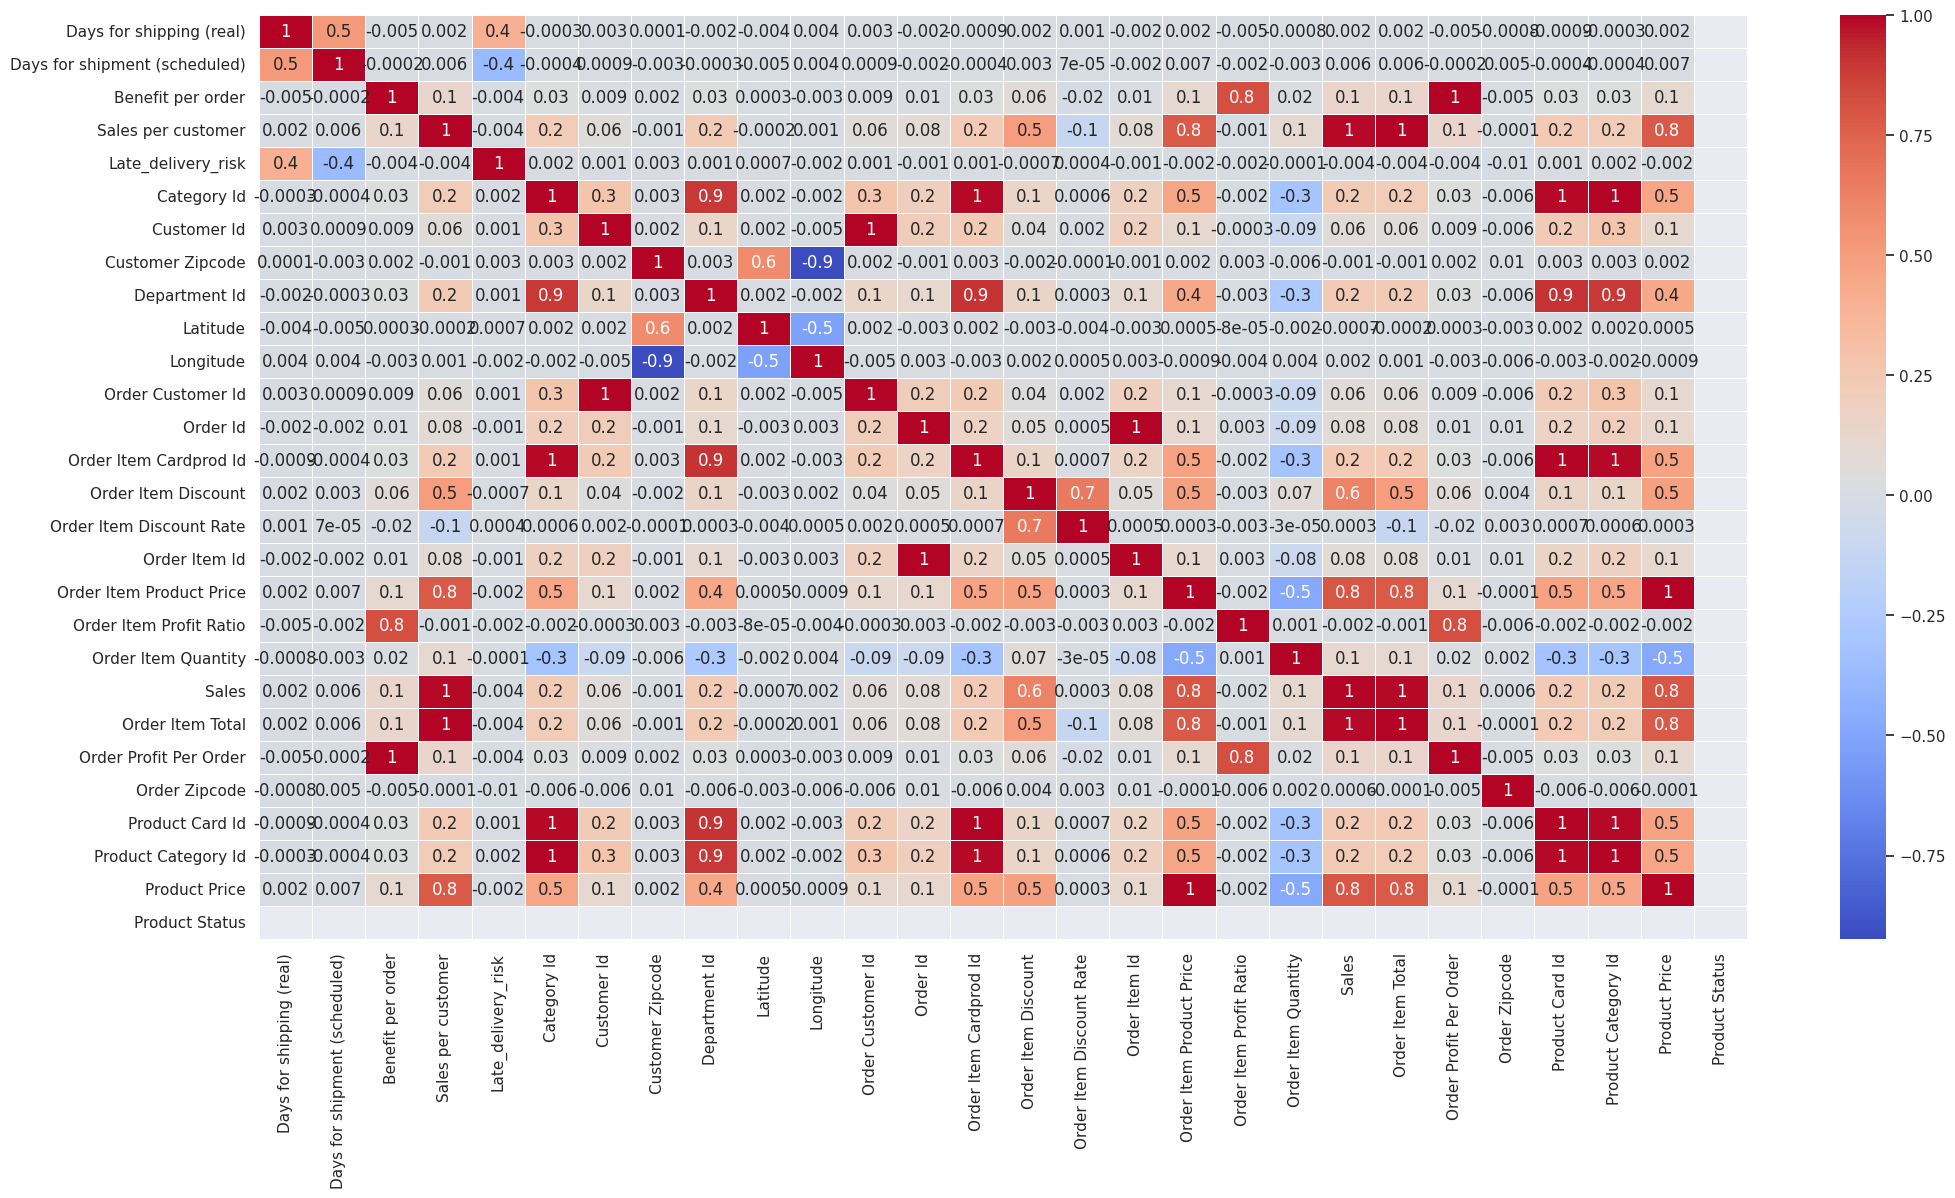

In [194]:
fig, ax = plt.subplots(figsize=(24,12))
seaborn.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')
plt.show()

In [236]:
total_region_count = df["Order Region"].value_counts()
total_region_count = total_region_count.to_frame()
total_region_count.reset_index(inplace=True)
total_region_count.columns = ["Order Regions", "Total Counts"]

In [237]:
late_delivery_counts.columns = ["Order Regions", "Counts"]

In [238]:
merged_value_counts = pandas.merge(left=total_region_count, right=late_delivery_counts, on=["Order Regions"])

In [239]:
merged_value_counts["Percentage_late"] = (merged_value_counts["Counts"]/merged_value_counts["Total Counts"]) * 100
merged_value_counts

,Order Regions,Total Counts,Counts,Percentage_late
0,Central America,28341,15518,54.754596
1,Western Europe,27109,15140,55.848611
2,South America,14935,8111,54.308671
3,Oceania,10148,5482,54.020497
4,Northern Europe,9792,5292,54.044118
5,Southeast Asia,9539,5297,55.529930
6,Southern Europe,9431,5129,54.384477
7,Caribbean,8318,4415,53.077663
8,West of USA,7993,4313,53.959715
9,South Asia,7731,4350,56.266977


In [240]:
on_time_shipping_counts.columns = ["Order Regions", "Counts"]
merged_value_counts_ontime = pandas.merge(left=total_region_count, right=on_time_shipping_counts, on=["Order Regions"])
merged_value_counts_ontime["Percentage_ontime"] = (merged_value_counts_ontime["Counts"]/merged_value_counts_ontime["Total Counts"]) * 100
merged_value_counts_ontime

,Order Regions,Total Counts,Counts,Percentage_ontime
0,Central America,28341,5090,17.959846
1,Western Europe,27109,4589,16.927958
2,South America,14935,2597,17.388684
3,Oceania,10148,1927,18.988963
4,Northern Europe,9792,1775,18.127042
5,Southeast Asia,9539,1631,17.098228
6,Southern Europe,9431,1655,17.548510
7,Caribbean,8318,1539,18.502044
8,West of USA,7993,1447,18.103340
9,South Asia,7731,1340,17.332816


In [241]:
merged_value_counts_ontime.set_index(keys="Order Regions", inplace=True)
merged_value_counts.set_index(keys="Order Regions", inplace=True)

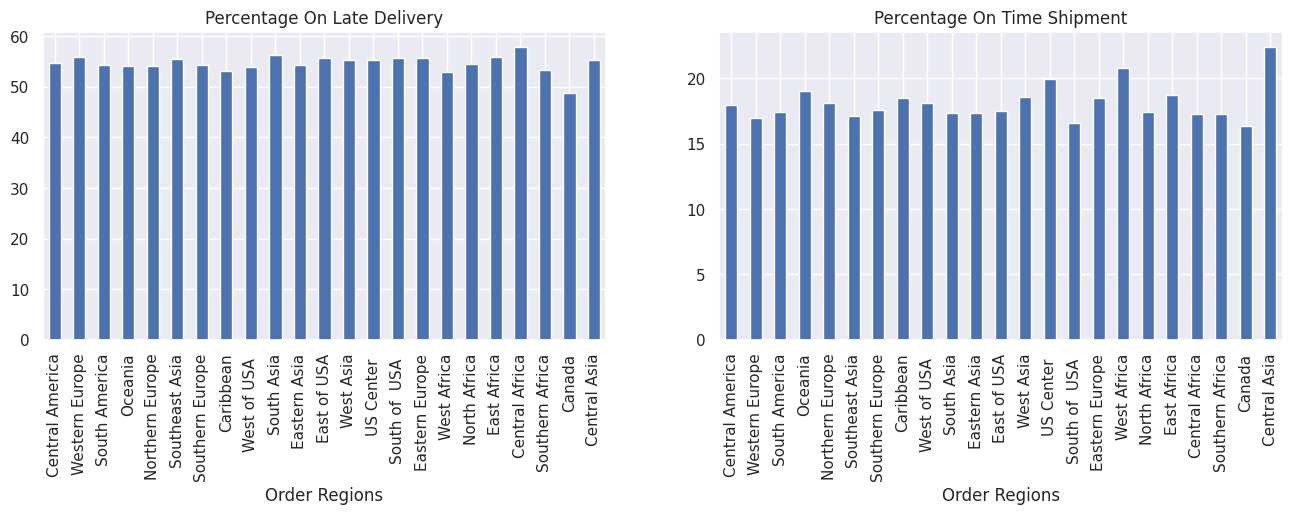

In [246]:
plt.subplot(1,2,1)
merged_value_counts["Percentage_late"].plot.bar(figsize=(16,4), title="Percentage On Late Delivery")
plt.subplot(1,2,2)
merged_value_counts_ontime["Percentage_ontime"].plot.bar(figsize=(16,4), title="Percentage On Time Shipment")
plt.show()

In [223]:
market_size = df.groupby("Market")["Sales"].sum()
market_counts = df["Market"].value_counts()

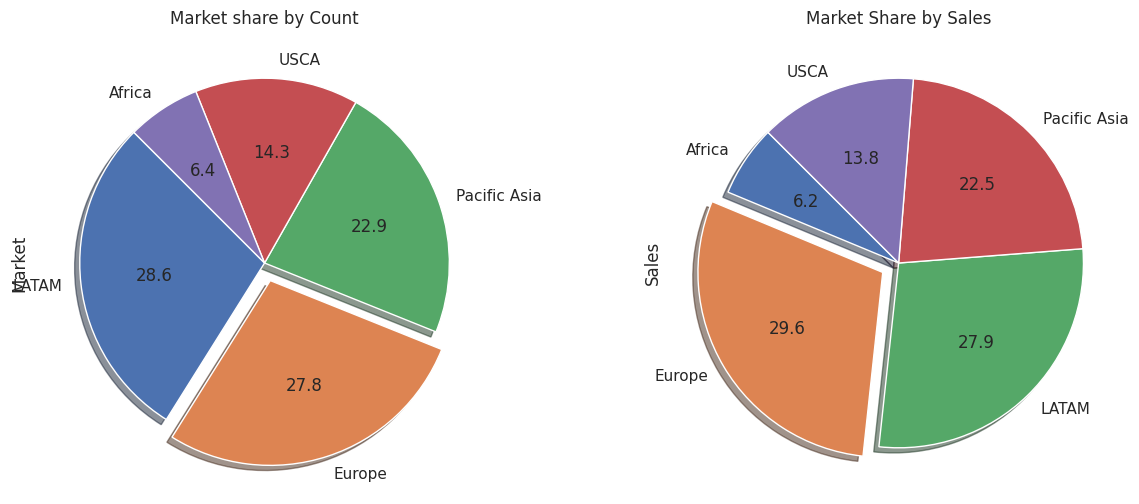

In [228]:
plt.subplot(1,2,1)
market_counts.plot.pie(figsize=(15,6), startangle=135, explode=(0,0.1,0,0,0),autopct='%.1f',shadow=True, title="Market share by Count")
plt.subplot(1,2,2)
market_size.plot.pie(figsize=(15,6), startangle=135, explode=(0,0.1,0,0,0),autopct='%.1f',shadow=True, title="Market Share by Sales")
plt.show()

In [251]:
discount_item = df.groupby("Product Name")[["Order Item Discount","Sales"]].mean()

In [252]:
discount_item

,Order Item Discount,Sales
Product Name,,
Adult dog supplies,8.549797,84.400002
Baby sweater,6.145700,59.080002
Bag Boy Beverage Holder,7.550681,75.686558
Bag Boy M330 Push Cart,24.003768,241.129274
Bowflex SelectTech 1090 Dumbbells,82.800000,599.989990
...,...,...
adidas Kids' F5 Messi FG Soccer Cleat,10.308092,104.302254
adidas Men's F10 Messi TRX FG Soccer Cleat,19.594984,184.690530
adidas Men's Germany Black Crest Away Tee,7.595744,74.307958


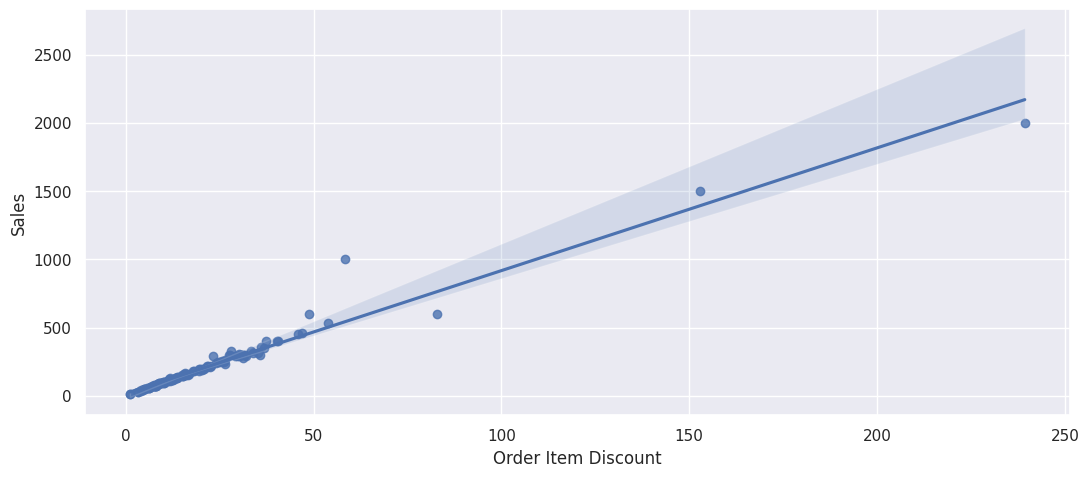

In [254]:
seaborn.set(rc={'figure.figsize':(12.7,5.27)})
seaborn.regplot(data=discount_item, x="Order Item Discount", y="Sales")
plt.show()

In [255]:
sort_by_discount = discount_item.sort_values(by="Order Item Discount", ascending=False)
sort_item_by_sales = discount_item.sort_values(by="Sales", ascending=False)

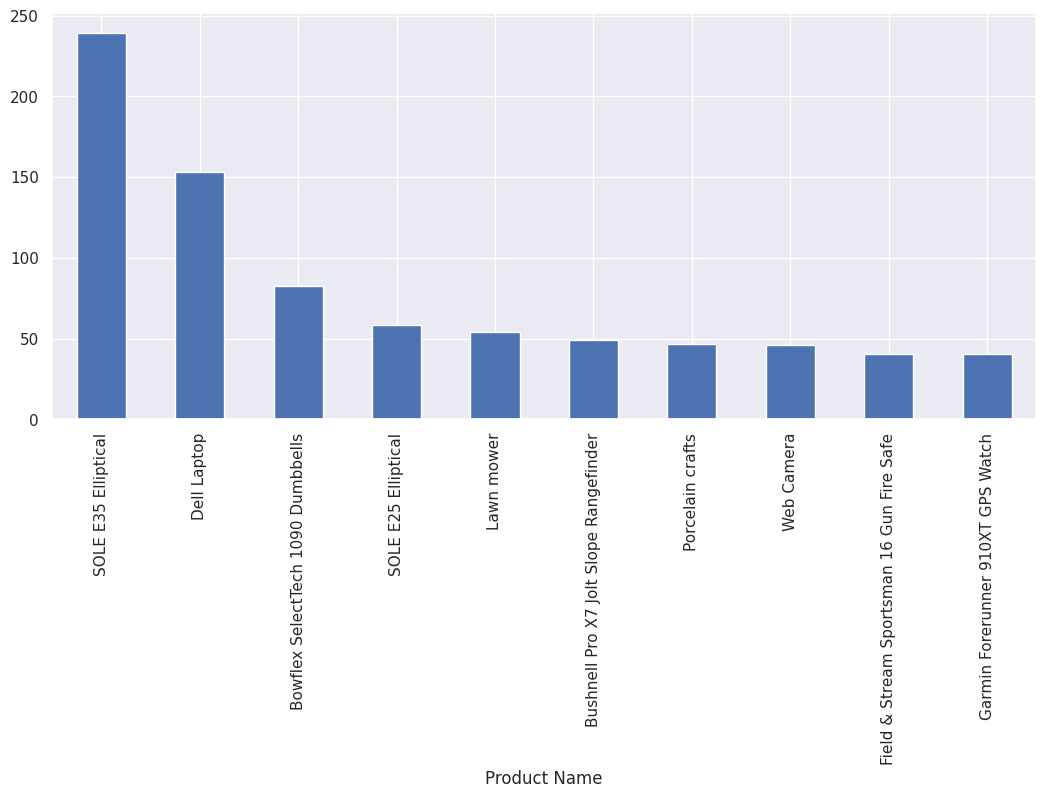

In [258]:
sort_by_discount["Order Item Discount"][:10].plot.bar()
plt.show()

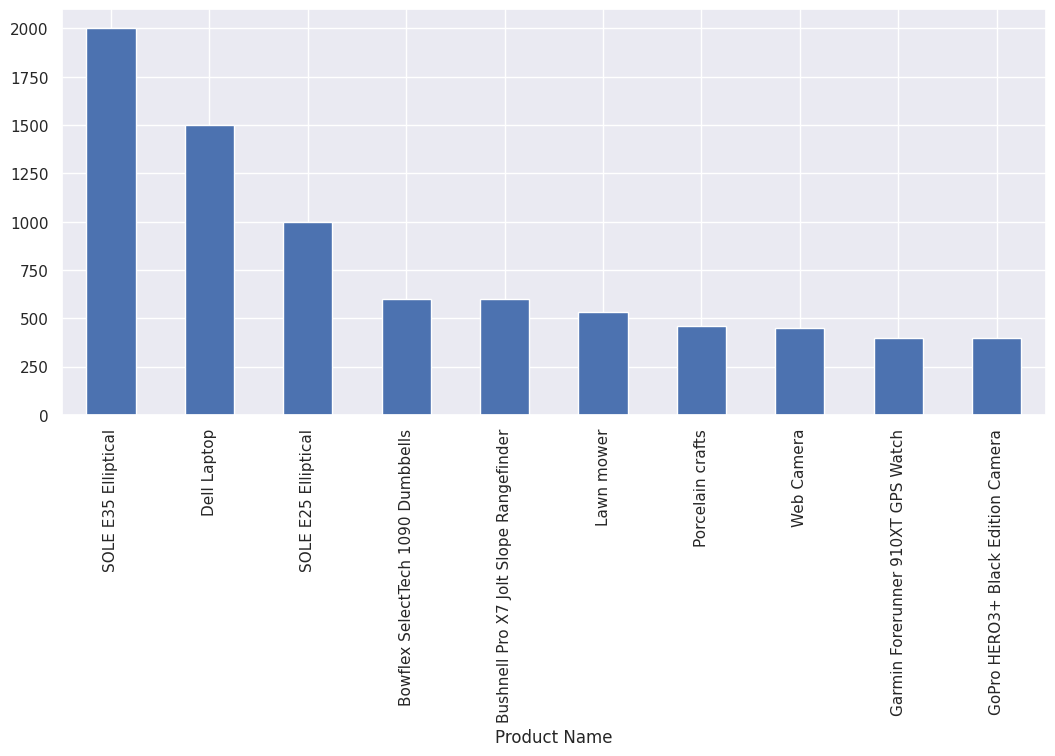

In [259]:
sort_item_by_sales["Sales"][:10].plot.bar()
plt.show()